## Example Usage of Oligomer Scaffold Split

### Import dependancies and load dataset / Config File

In [16]:
import os
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw, rdFMCS
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.decomposition import PCA

from geom3d.train_models import *
import torch
import copy
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
config_dir = os.getcwd()+"/datasize_study/SchNet_opt_combined_80000"
config = read_config(config_dir)

dataset_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasize_study/80000dataset_combined.pt"
dataset = torch.load(dataset_path)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/datasize_study/SchNet_opt_combined_80000


### Example of Oligomer Scaffold Split

In [11]:
import importlib
from geom3d.utils import oligomer_scaffold_split
from geom3d.utils.oligomer_scaffold_split import *

importlib.reload(oligomer_scaffold_split)

config["manual_cluster_horizontal_line_y"] = 1.1
config["manual_cluster_vertical_line_x1"] = 0.5
config["manual_cluster_vertical_line_x2"] = 2.2

config["test_set_oligomer_cluster"] = 2

cluster_keys = oligomer_scaffold_splitter(dataset, config)

print(cluster_keys)


Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Chosen cluster: 2
Length of Cluster 2: 5478
['HFLGOOJSOVMNEC-UHFFFAOYSA-N', 'BUUFJUXSPBZNQD-UHFFFAOYSA-N', 'OOICPLJNJGUXME-UHFFFAOYSA-N', 'PDOYPHHMCDOPNI-UHFFFAOYSA-N', 'LXVMXXMBJXEMNF-UHFFFAOYSA-N', 'BJPFUOGOHWEMER-UHFFFAOYSA-N', 'VKUCDIBGBGEDSO-UHFFFAOYSA-N', 'FPGYPBCIZZERKV-UHFFFAOYSA-N', 'HFFINUZBYDOIGW-UHFFFAOYSA-N', 'XJNZKNBMIQSZTO-UHFFFAOYSA-N', 'BNRAOEMJZNVVFK-UHFFFAOYSA-N', 'BVNZJWBAQBPQFE-UHFFFAOYSA-N', 'YHKQZDADAIUZBG-UHFFFAOYSA-N', 'MJDOALWGDIJVRN-UHFFFAOYSA-N', 'QLSMHOQOGABGSR-UHFFFAOYSA-N', 'RHEKQLZXXAYRPP-UHFFFAOYSA-N', 'GMVGAAQXKUFOOP-UHFFFAOYSA-N', 'PEUFRVDETRSIIT-UHFFFAOYSA-N', 'OAVCHEDQSJAUBH-UHFFFAOYSA-N', 'UDYPRNABRRTCJU-UHFFFAOYSA-N', 'BPJWBFNANLJRNH-UHFFFAOYSA-N', 'KSVQTUBHGTXSMP-UHFFFAOYSA-N',

### Choose Clustering parameters

In [2]:
import importlib
from geom3d.utils import oligomer_scaffold_split
from geom3d.utils.oligomer_scaffold_split import *

importlib.reload(oligomer_scaffold_split)

config["manual_cluster_horizontal_line_y"] = 1.1
config["manual_cluster_vertical_line_x1"] = 0.5
config["manual_cluster_vertical_line_x2"] = 2.2

df_total_2 = cluster_analysis(dataset, config)

print(df_total_2['Cluster'].value_counts())

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Number of oligomers in each cluster:
Cluster
1    42926
3    13254
4    11471
6     7315
2     5478
5     1760
Name: count, dtype: int64


In [5]:
%matplotlib inline

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Number of oligomers in each cluster:


/rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/utils/oligomer_scaffold_split.py:195: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['2d_tani_pca_1'], cluster_data['2d_tani_pca_2'], label=f'Cluster {cluster_label}', alpha=0.7, c=colors[cluster_label % len(colors)])


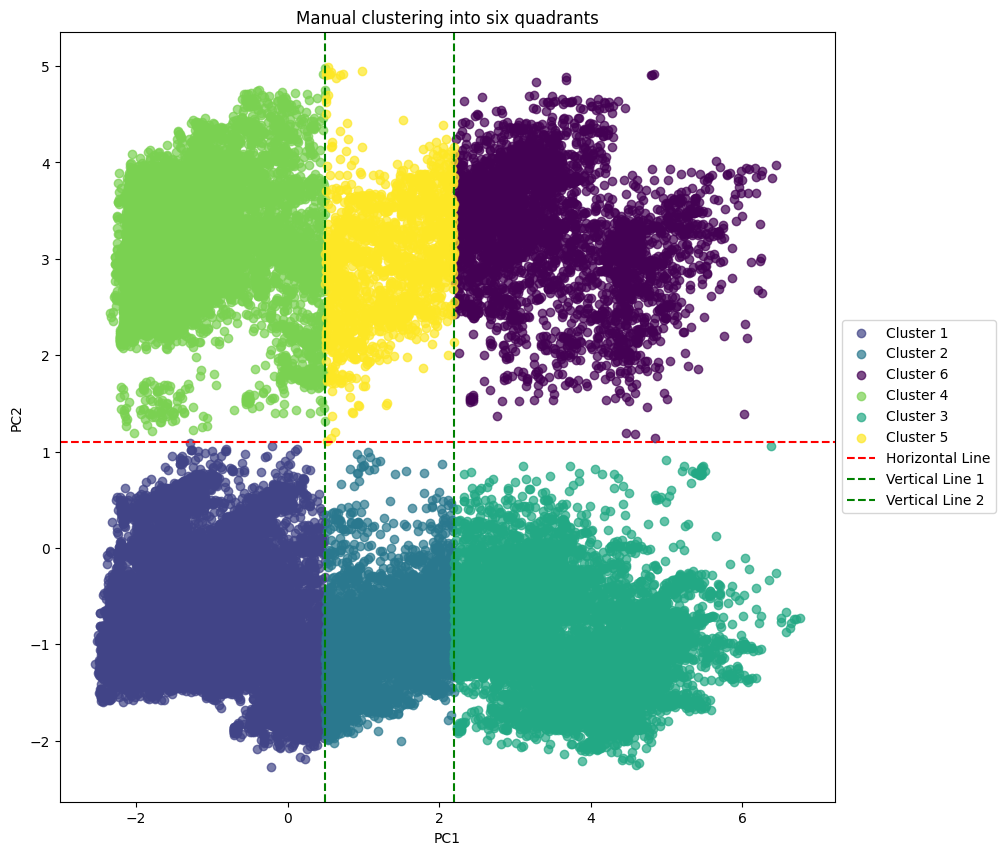

In [14]:
import importlib
from geom3d.utils import oligomer_scaffold_split
from geom3d.utils.oligomer_scaffold_split import *

importlib.reload(oligomer_scaffold_split)

manual_cluster_plot(dataset, config)

In [17]:
import importlib
from geom3d.utils import oligomer_scaffold_split
from geom3d.utils.oligomer_scaffold_split import *

importlib.reload(oligomer_scaffold_split)

df_total, df_precursors, df_path, df_path_2, df_precursors_path = load_dataframes(dataset, config)
check_data_exists(df_total, dataset, config)

horizontal_line_y = config["manual_cluster_horizontal_line_y"] if "manual_cluster_horizontal_line_y" in config else 1.1
vertical_line_x1 = config["manual_cluster_vertical_line_x1"] if "manual_cluster_vertical_line_x1" in config else 0.5
vertical_line_x2 = config["manual_cluster_vertical_line_x2"] if "manual_cluster_vertical_line_x2" in config else 2.2

# Perform manual clustering
df_total = manual_cluster(df_total, horizontal_line_y, vertical_line_x1, vertical_line_x2)

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total


In [18]:
%matplotlib inline

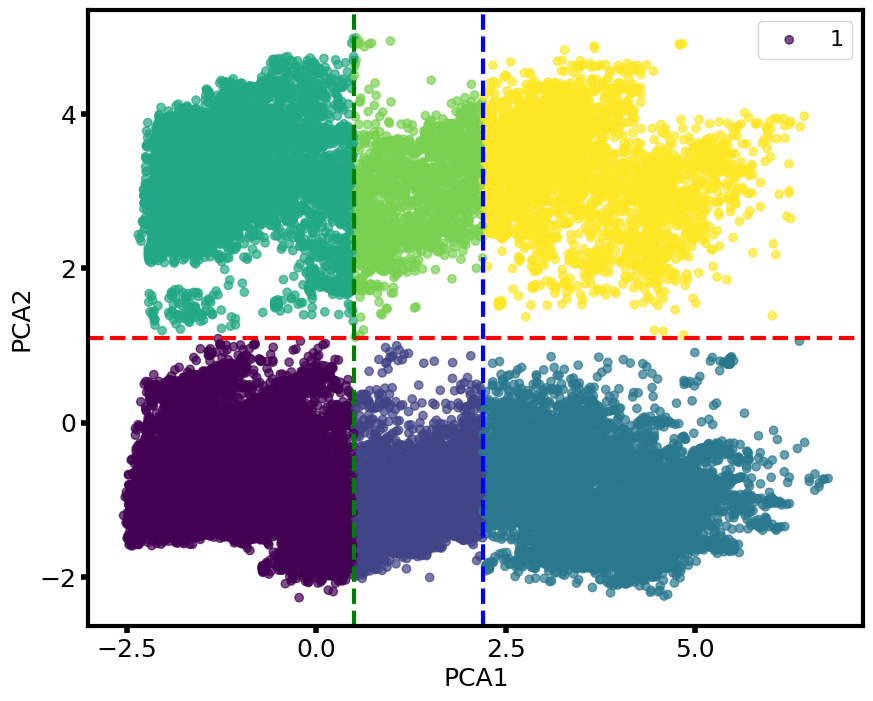

In [22]:
# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_total['2d_tani_pca_1'], df_total['2d_tani_pca_2'], c=df_total['Cluster'], cmap='viridis', alpha=0.7)

plt.axhline(y=horizontal_line_y, color='r', linestyle='--', label='Separator 1', linewidth=3)
plt.axvline(x=vertical_line_x1, color='g', linestyle='--', label='Separator 2', linewidth=3)
plt.axvline(x=vertical_line_x2, color='b', linestyle='--', label='Separator 3', linewidth=3)
plt.xlabel("PCA1", fontsize=18)
plt.ylabel("PCA2", fontsize=18)

#make axes thicker
plt.gca().spines['top'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_linewidth(3)

# Increase font size, make bold, and change to Aptos font
plt.tick_params(axis='both', which='major', labelsize=18)

# remove some ticks
plt.gca().xaxis.set_tick_params(width=4, size=5)
plt.gca().yaxis.set_tick_params(width=4, size=5)

# make less ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig(f'/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/oligomer_manual_cluster.png', dpi=400)



### Visualise substructures

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Number of oligomers in each cluster:
Length of Cluster 2: 5478
Clustered
Performing substructure analysis for Cluster 2


Generating substructures for Cluster 2:   0%|          | 0/5478 [00:00<?, ?it/s]

representative oligomer in cluster 2


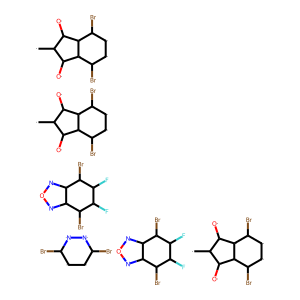

Generating substructures for Cluster 2: 100%|██████████| 5478/5478 [03:34<00:00, 25.51it/s]


Top 1 Substructure (Frequency: 1393 oligomers):


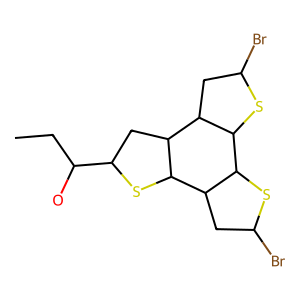

Top 2 Substructure (Frequency: 1350 oligomers):


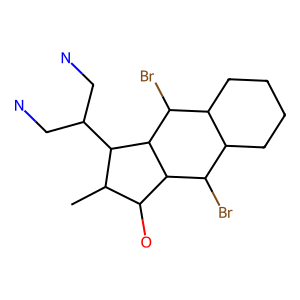

Top 3 Substructure (Frequency: 276 oligomers):


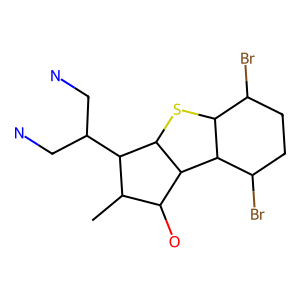

In [10]:
import importlib
from geom3d.utils import oligomer_scaffold_split
from geom3d.utils.oligomer_scaffold_split import *

importlib.reload(oligomer_scaffold_split)

config["test_set_oligomer_cluster"] = 2

substructure_analysis_oligomers(dataset, config)